## Iteration 5.1

In [ ]:
data_dir = "../../Merge Set Ordered"
iteration = "iteration_5_1"
model_dir = f'../../models/best_model_{iteration}.h5'


In [ ]:

from keras.applications.mobilenet_v3 import preprocess_input


# Now import HomemadeDataloader from homemade_dataloader.py
from homemade_dataloader import DataloaderFactory


batch_size=32
dist = [115,115,115,115,115,115,115]
print(sum(dist))

factory = DataloaderFactory(data_dir, batch_size=batch_size, image_size=(224,224), set_distribution=(70,15,15), class_distribution=dist, preprocess_function=preprocess_input)

train_generator, validation_generator, test_generator = factory.get_dataloaders()

2024-11-21 14:59:39.197947: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-21 14:59:39.453740: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-21 14:59:39.456364: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-21 14:59:40.760324: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


805
Training set
Found 8202 images belonging to 7 classes (dist says 805)
Found 1758 images belonging to 7 classes (dist says 0)
Found 1758 images belonging to 7 classes (dist says 0)


In [ ]:
import numpy as np
class_names = ['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6']

def print_sample_distribution(dataloader, class_names):
    """Print the distribution of samples per class for each batch and overall."""

    # Initialize total counts for all classes
    total_class_counts = {class_name: 0 for class_name in class_names}

    # Per-batch distribution
    print("\nDistribution of samples per class for each batch:")
    print("Number of batches:", len(dataloader))
    for batch_idx in range(len(dataloader)):
        # Fetch batch data
        img, labels = dataloader[batch_idx]

        # Count occurrences of each class in the batch
        batch_class_counts = {class_name: 0 for class_name in class_names}
        for label_vector in labels:
            class_index = np.argmax(label_vector)  # Convert one-hot to class index
            batch_class_counts[class_names[class_index]] += 1
            total_class_counts[class_names[class_index]] += 1

        # Print batch distribution
        print(f"Batch {batch_idx + 1}:")
        for class_name, count in batch_class_counts.items():
            print(f"  Class '{class_name}': {count} samples")

    # Print overall distribution
    print("\nTotal distribution of samples across all batches:")
    for class_name, count in total_class_counts.items():
        print(f"  Class '{class_name}': {count} samples")





# Example usage with your defined dataloader
print("Train Generator Distribution:", test_generator.isValidation)
print_sample_distribution(train_generator, factory.class_names)

# print("\nValidation Generator Distribution:")
# print_sample_distribution(validation_generator, factory.class_names)

# print("\nTest Generator Distribution:")
# print_sample_distribution(test_generator, factory.class_names)



In [ ]:

import sys
import os
sys.path.append(os.path.abspath("../.."))
from custom_model import CustomModel

model = CustomModel(number_of_samples=train_generator.samples)
model.compile()

In [ ]:
history = model.fit_epochs(train_generator, validation_generator, epochs=10, checkpoint_path=model_dir)

Epoch 1/10


2024-11-21 15:02:35.064935: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25690112 exceeds 10% of free system memory.
2024-11-21 15:02:35.115269: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25690112 exceeds 10% of free system memory.
2024-11-21 15:02:35.115325: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25690112 exceeds 10% of free system memory.
2024-11-21 15:02:35.136359: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 26150912 exceeds 10% of free system memory.
2024-11-21 15:02:35.158705: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 28901376 exceeds 10% of free system memory.


25/25 [==============================] - ETA: 0s - loss: 2.6440 - accuracy: 0.1975
Epoch 1: val_loss improved from inf to 2.47138, saving model to ../../models/best_model_iteration_5_1.h5


/home/renemartensen/Desktop/Aarhus universitet/Deep Learning/deep_learning_group2/mothermark_cancer_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - 30s 1s/step - loss: 2.6440 - accuracy: 0.1975 - val_loss: 2.4714 - val_accuracy: 0.2251
Training set
Epoch 2/10
25/25 [==============================] - ETA: 0s - loss: 2.5073 - accuracy: 0.2425
Epoch 2: val_loss improved from 2.47138 to 2.35690, saving model to ../../models/best_model_iteration_5_1.h5
25/25 [==============================] - 27s 1s/step - loss: 2.5073 - accuracy: 0.2425 - val_loss: 2.3569 - val_accuracy: 0.2390
Training set
Epoch 3/10
25/25 [==============================] - ETA: 0s - loss: 2.1543 - accuracy: 0.2825
Epoch 3: val_loss improved from 2.35690 to 1.88780, saving model to ../../models/best_model_iteration_5_1.h5
25/25 [==============================] - 27s 1s/step - loss: 2.1543 - accuracy: 0.2825 - val_loss: 1.8878 - val_accuracy: 0.3553
Training set
Epoch 4/10
25/25 [==============================] - ETA: 0s - loss: 1.8659 - accuracy: 0.3537
Epoch 4: val_loss improved from 1.88780 to 1.47373, saving model to ../../

All layers have been unfrozen.
Epoch 1/10
25/25 [==============================] - 46s 2s/step - loss: 2.7179 - accuracy: 0.3288 - val_loss: 1.3273 - val_accuracy: 0.5932
Training set
Epoch 2/10
25/25 [==============================] - 36s 1s/step - loss: 2.5424 - accuracy: 0.3462 - val_loss: 1.3068 - val_accuracy: 0.6667
Training set
Epoch 3/10
25/25 [==============================] - 35s 1s/step - loss: 2.5022 - accuracy: 0.3850 - val_loss: 1.5949 - val_accuracy: 0.6221
Training set
Epoch 4/10
25/25 [==============================] - 34s 1s/step - loss: 2.4503 - accuracy: 0.4112 - val_loss: 2.3448 - val_accuracy: 0.4722
Training set
Epoch 5/10
25/25 [==============================] - 34s 1s/step - loss: 2.5266 - accuracy: 0.4162 - val_loss: 2.3215 - val_accuracy: 0.5318
Training set
Epoch 6/10
25/25 [==============================] - 34s 1s/step - loss: 2.3582 - accuracy: 0.4588 - val_loss: 2.0440 - val_accuracy: 0.5909
Training set
Epoch 7/10
25/25 [==============================] -

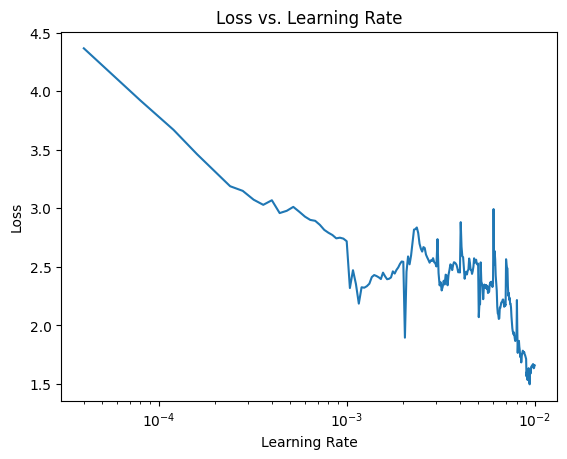

In [ ]:
model.unfreeze()
model.lr_find(train_generator, validation_generator)

In [ ]:
history = model.fit_epochs(train_generator, validation_generator, epochs=50, checkpoint_path=model_dir, lr=[1e-5, 5e-3])

Epoch 1/50
25/25 [==============================] - ETA: 0s - loss: 1.6982 - accuracy: 0.4825
Epoch 1: val_loss improved from inf to 1.97176, saving model to ../../models/best_model_iteration_5_1.h5


/home/renemartensen/Desktop/Aarhus universitet/Deep Learning/deep_learning_group2/mothermark_cancer_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - 34s 1s/step - loss: 1.6982 - accuracy: 0.4825 - val_loss: 1.9718 - val_accuracy: 0.5671
Training set
Epoch 2/50
25/25 [==============================] - ETA: 0s - loss: 1.5673 - accuracy: 0.5075
Epoch 2: val_loss improved from 1.97176 to 1.82878, saving model to ../../models/best_model_iteration_5_1.h5
25/25 [==============================] - 34s 1s/step - loss: 1.5673 - accuracy: 0.5075 - val_loss: 1.8288 - val_accuracy: 0.5868
Training set
Epoch 3/50
25/25 [==============================] - ETA: 0s - loss: 1.4094 - accuracy: 0.5250
Epoch 3: val_loss improved from 1.82878 to 1.70525, saving model to ../../models/best_model_iteration_5_1.h5
25/25 [==============================] - 32s 1s/step - loss: 1.4094 - accuracy: 0.5250 - val_loss: 1.7053 - val_accuracy: 0.6181
Training set
Epoch 4/50
25/25 [==============================] - ETA: 0s - loss: 1.3823 - accuracy: 0.5337
Epoch 4: val_loss did not improve from 1.70525
25/25 [====================

['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6']
Balanced Accuracy: 0.5869086247169345
Accuracy on test set: 0.6903935074806213
F1 Score: 0.7121234617315392


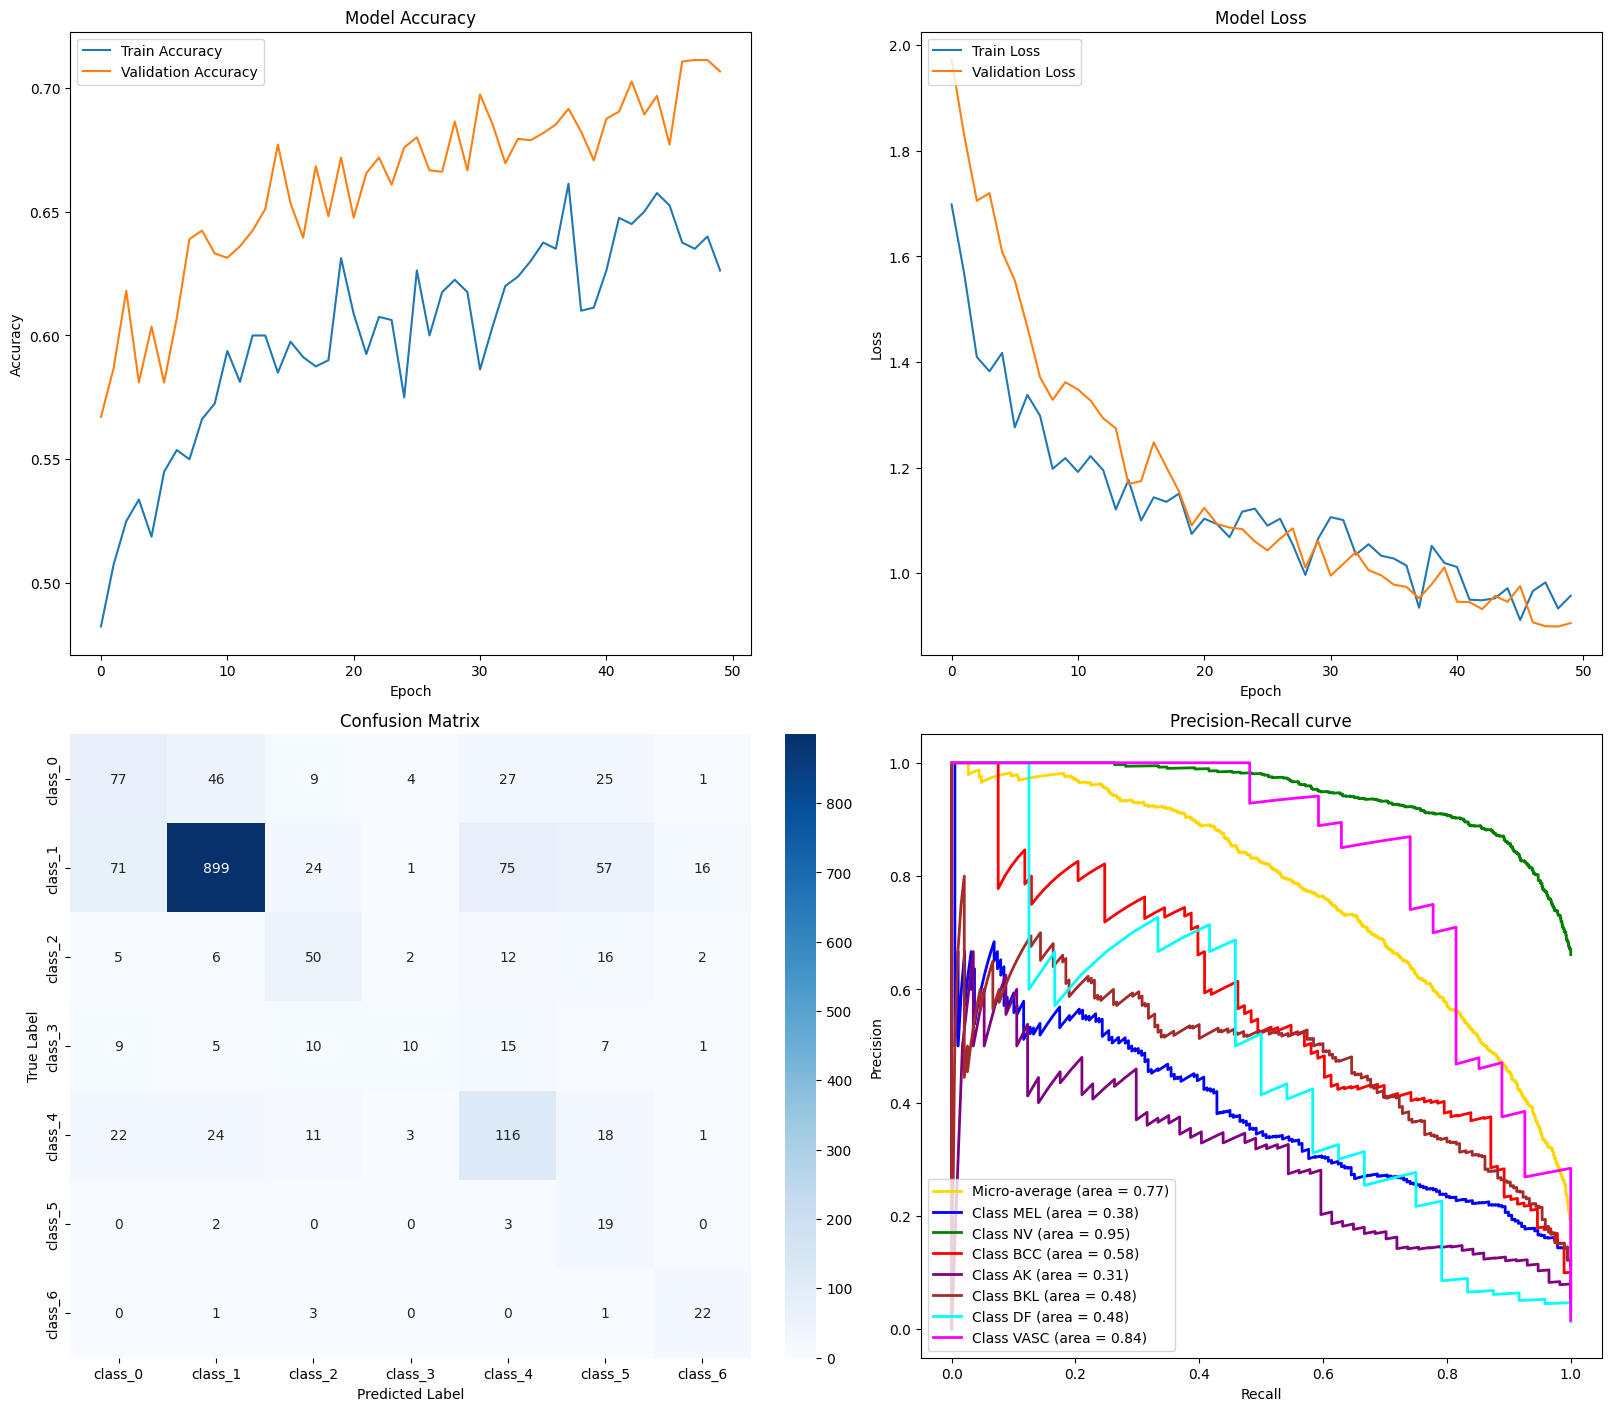

In [ ]:
from plot_utils import show_all_plots
from tensorflow.keras.models import load_model

m = load_model(model_dir)

show_all_plots(history, m, test_generator)

## Iteration 5.2

In [1]:
data_dir = "../../Merge Set Ordered"
iteration = "iteration_5_2"
model_dir = f'../../models/best_model_{iteration}.h5'


In [8]:

from keras.applications.mobilenet_v3 import preprocess_input


# Now import HomemadeDataloader from homemade_dataloader.py
from homemade_dataloader import DataloaderFactory


batch_size=32
dist = [1171,1171,1171,1171,1171,1171,1171]
print(sum(dist))
histories = []

factory = DataloaderFactory(data_dir, batch_size=batch_size, image_size=(224,224), set_distribution=(70,15,15), class_distribution=dist, preprocess_function=preprocess_input)

train_generator, validation_generator, test_generator = factory.get_dataloaders()

8197
Found 8202 images belonging to 7 classes (dist says 8197)
Found 1758 images belonging to 7 classes (dist says 0)
Found 1758 images belonging to 7 classes (dist says 0)


In [3]:

import sys
import os
sys.path.append(os.path.abspath("../.."))
from custom_model import CustomModel

model = CustomModel(number_of_samples=train_generator.samples)
model.compile()

In [4]:
history1 = model.fit_epochs(train_generator, validation_generator, epochs=5, checkpoint_path=model_dir)
histories.append(history1)

Epoch 1/5
256/256 [==============================] - ETA: 0s - loss: 2.0066 - accuracy: 0.3402
Epoch 1: val_loss improved from inf to 1.28990, saving model to ../../models/best_model_iteration_5_2.h5
256/256 [==============================] - 76s 294ms/step - loss: 2.0066 - accuracy: 0.3402 - val_loss: 1.2899 - val_accuracy: 0.5567
Epoch 2/5


/Users/sebastiangodske/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


256/256 [==============================] - ETA: 0s - loss: 1.5690 - accuracy: 0.4601
Epoch 2: val_loss improved from 1.28990 to 1.17582, saving model to ../../models/best_model_iteration_5_2.h5
256/256 [==============================] - 78s 306ms/step - loss: 1.5690 - accuracy: 0.4601 - val_loss: 1.1758 - val_accuracy: 0.6123
Epoch 3/5
256/256 [==============================] - ETA: 0s - loss: 1.4560 - accuracy: 0.4965
Epoch 3: val_loss did not improve from 1.17582
256/256 [==============================] - 80s 311ms/step - loss: 1.4560 - accuracy: 0.4965 - val_loss: 1.1809 - val_accuracy: 0.5949
Epoch 4/5
256/256 [==============================] - ETA: 0s - loss: 1.3915 - accuracy: 0.5161
Epoch 4: val_loss improved from 1.17582 to 1.05107, saving model to ../../models/best_model_iteration_5_2.h5
256/256 [==============================] - 81s 318ms/step - loss: 1.3915 - accuracy: 0.5161 - val_loss: 1.0511 - val_accuracy: 0.6678
Epoch 5/5
256/256 [==============================] - ETA: 

All layers have been unfrozen.
Epoch 1/10
256/256 [==============================] - 120s 462ms/step - loss: 2.1560 - accuracy: 0.4081 - val_loss: 1.1214 - val_accuracy: 0.6875
Epoch 2/10
256/256 [==============================] - 130s 508ms/step - loss: 1.7556 - accuracy: 0.4885 - val_loss: 1.3002 - val_accuracy: 0.6939
Epoch 3/10
256/256 [==============================] - 142s 555ms/step - loss: 1.5019 - accuracy: 0.5413 - val_loss: 1.2314 - val_accuracy: 0.6406
Epoch 4/10
256/256 [==============================] - 119s 462ms/step - loss: 1.2704 - accuracy: 0.5775 - val_loss: 0.9630 - val_accuracy: 0.6904
Epoch 5/10
256/256 [==============================] - 127s 494ms/step - loss: 1.1459 - accuracy: 0.6029 - val_loss: 0.9767 - val_accuracy: 0.6939
Epoch 6/10
256/256 [==============================] - 119s 464ms/step - loss: 1.0460 - accuracy: 0.6257 - val_loss: 1.0000 - val_accuracy: 0.6742
Epoch 7/10
256/256 [==============================] - 105s 410ms/step - loss: 0.9809 - accura

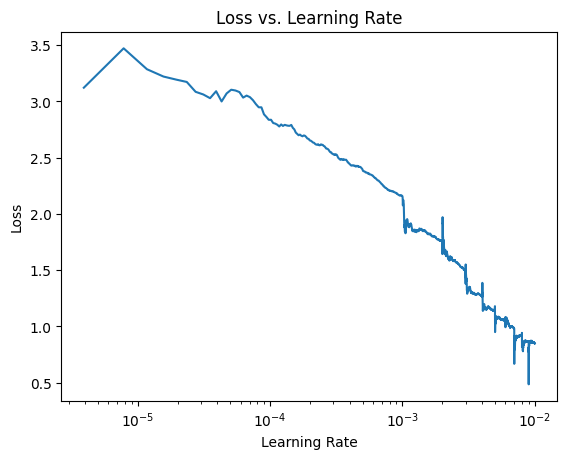

In [5]:
model.unfreeze()
model.lr_find(train_generator, validation_generator)

In [6]:
history2 = model.fit_epochs(train_generator, validation_generator, epochs=50, checkpoint_path=model_dir, lr=[1e-4, 1e-3])
histories.append(history2)

Epoch 1/50
256/256 [==============================] - ETA: 0s - loss: 0.7989 - accuracy: 0.7013
Epoch 1: val_loss improved from inf to 1.07193, saving model to ../../models/best_model_iteration_5_2.h5
256/256 [==============================] - 104s 402ms/step - loss: 0.7989 - accuracy: 0.7013 - val_loss: 1.0719 - val_accuracy: 0.6713
Epoch 2/50


/Users/sebastiangodske/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


256/256 [==============================] - ETA: 0s - loss: 0.7858 - accuracy: 0.7032
Epoch 2: val_loss improved from 1.07193 to 0.98818, saving model to ../../models/best_model_iteration_5_2.h5
256/256 [==============================] - 97s 379ms/step - loss: 0.7858 - accuracy: 0.7032 - val_loss: 0.9882 - val_accuracy: 0.6956
Epoch 3/50
256/256 [==============================] - ETA: 0s - loss: 0.7861 - accuracy: 0.7100
Epoch 3: val_loss improved from 0.98818 to 0.95300, saving model to ../../models/best_model_iteration_5_2.h5
256/256 [==============================] - 96s 373ms/step - loss: 0.7861 - accuracy: 0.7100 - val_loss: 0.9530 - val_accuracy: 0.7066
Epoch 4/50
256/256 [==============================] - ETA: 0s - loss: 0.7515 - accuracy: 0.7220
Epoch 4: val_loss improved from 0.95300 to 0.93590, saving model to ../../models/best_model_iteration_5_2.h5
256/256 [==============================] - 90s 351ms/step - loss: 0.7515 - accuracy: 0.7220 - val_loss: 0.9359 - val_accuracy: 0

['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6']
Balanced Accuracy: 0.6893861792426973
Accuracy on test set: 0.7453703880310059
F1 Score: 0.7537624875609487


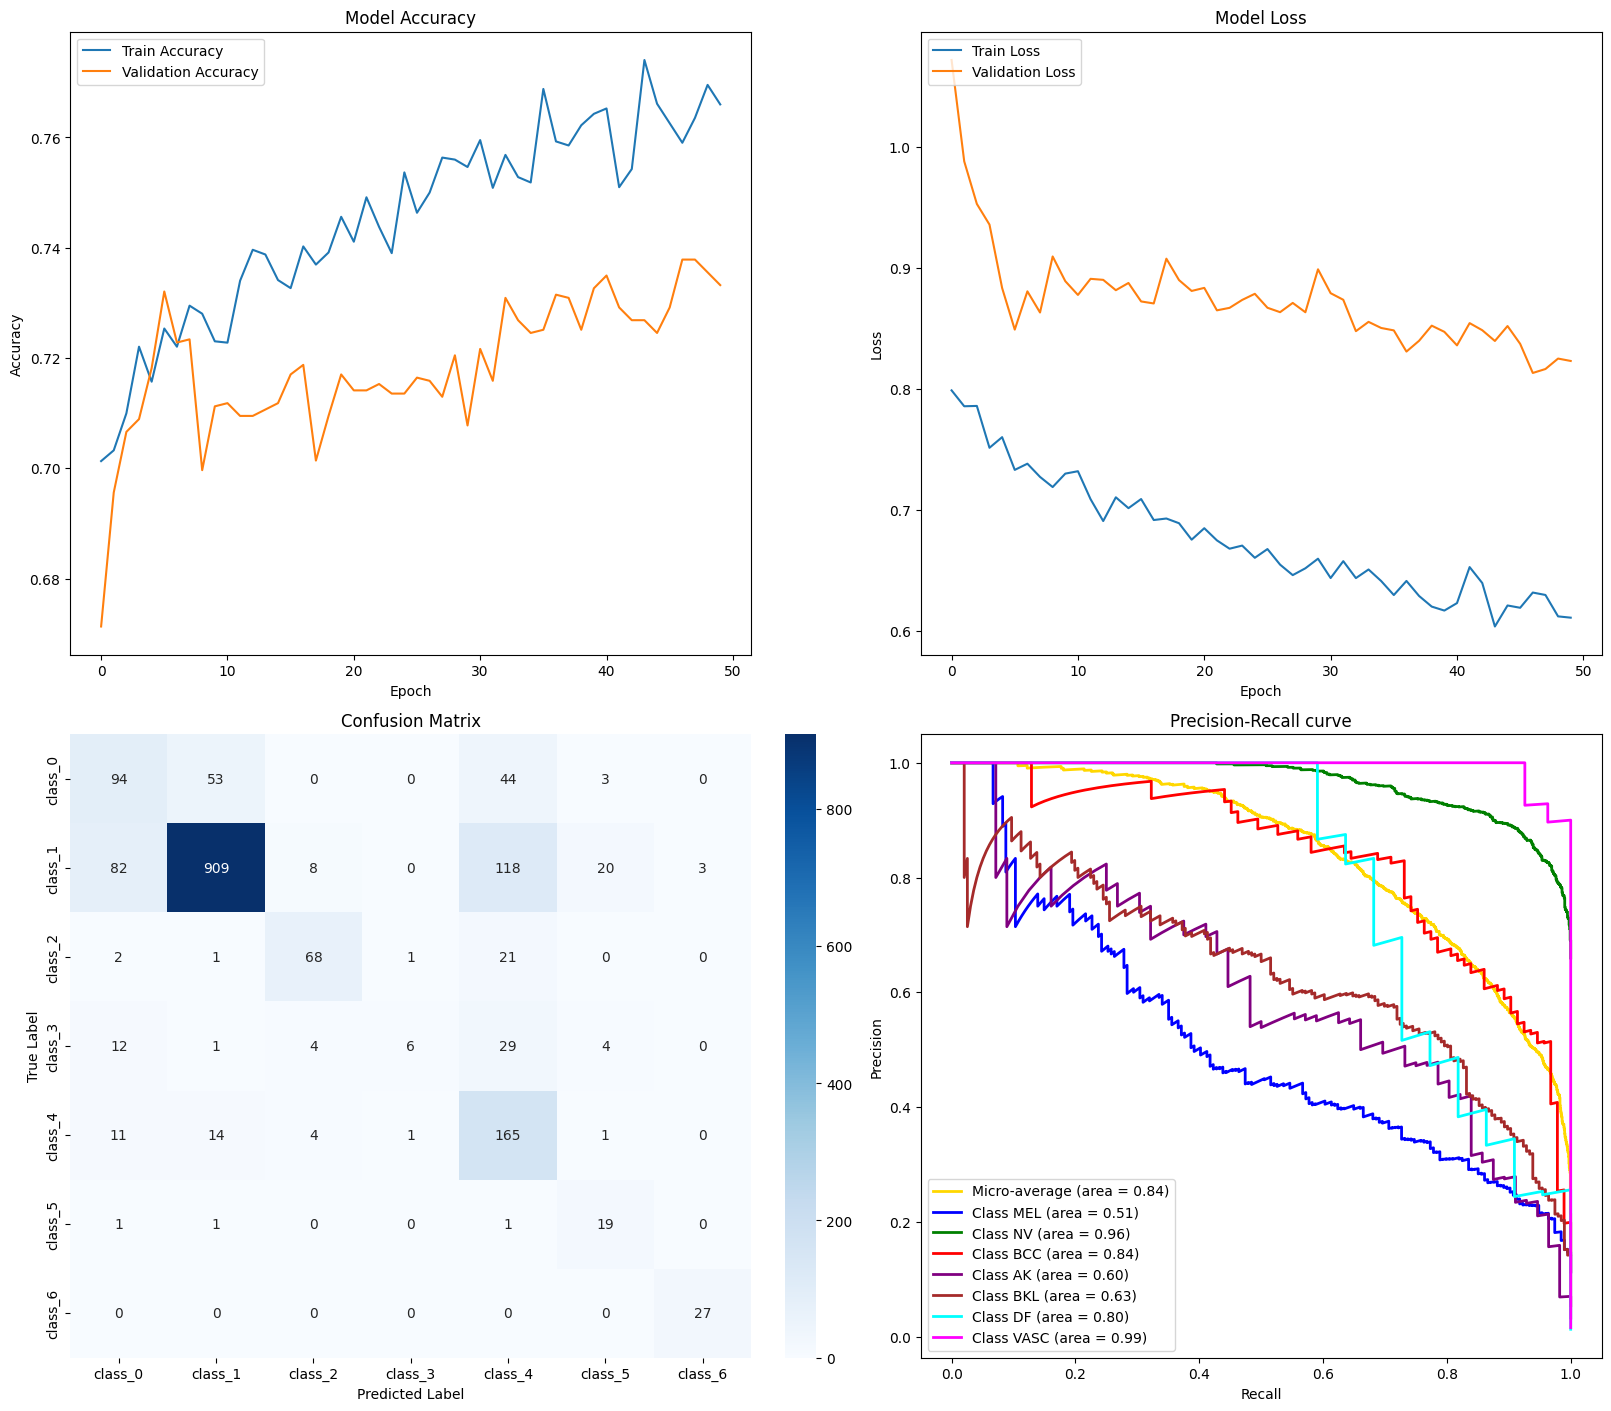

In [19]:

from plot_utils import show_all_plots
from tensorflow.keras.models import load_model

m = load_model(model_dir)
histories = [history1, history2]
show_all_plots(history2, m, test_generator)